# Analyzing Movie Reviews from RT, IMDB, Bookmyshow

### Data structure

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
movies = pd.read_csv("Bookmyshow_score_comparison.csv")
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Bookmyshow_Stars,Bookmyshow_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Bookmyshow_votes,Bookmyshow_Difference
0,Tenet (2020),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,The Invisible Man (2020),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Bad Boys for Life (2020),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Wonder Woman 1984 (2020),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Soul (2020),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


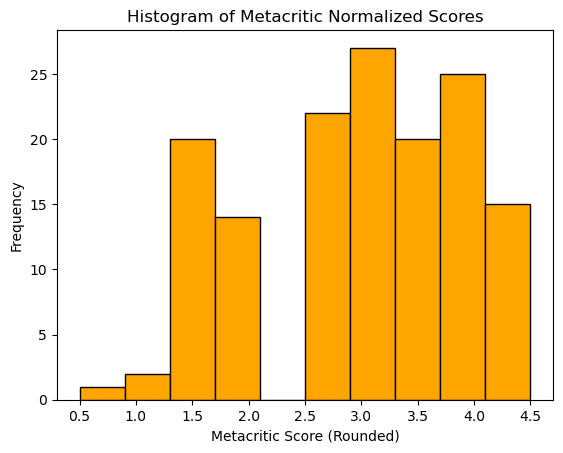

In [52]:
plt.hist(movies["Metacritic_norm_round"], bins=10, color='orange', edgecolor='black')
plt.title('Histogram of Metacritic Normalized Scores')
plt.xlabel('Metacritic Score (Rounded)')
plt.ylabel('Frequency')
plt.show()

In [60]:
plt.hist(movies["Bookmyshow_Stars"])

(array([12.,  0., 27.,  0.,  0., 41.,  0., 55.,  0., 11.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 10 artists>)

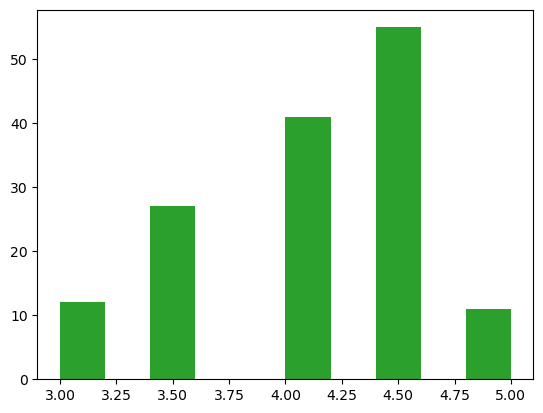

In [62]:
plt.hist(movies["Bookmyshow_Stars"])
plt.show()

In [66]:
import numpy as np

Bookmyshow_mean = movies["Bookmyshow_Stars"].mean()
Bookmyshow_mean

4.089041095890411

In [70]:
Bookmyshow_median = movies["Bookmyshow_Stars"].median()
Bookmyshow_median

4.0

In [72]:
meta_mean = movies["Metacritic_norm_round"].mean()
meta_med = movies["Metacritic_norm_round"].median()
print("Metacritic mean: " + str(meta_mean))
print("Metacritic median: " + str(meta_med))

Metacritic mean: 2.9726027397260273
Metacritic median: 3.0


## Correlation between Bookmyshow and Metacritic

There appears to be low correlation

In [80]:
plt.scatter(movies["Metacritic_norm_round"], movies["Bookmyshow_Stars"])

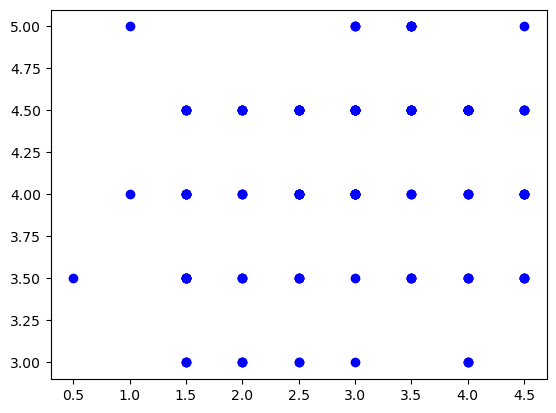

In [88]:
plt.scatter(movies["Metacritic_norm_round"], movies["Bookmyshow_Stars"], color='blue')
plt.show()

In [90]:
movies["fm_diff"] = np.abs(movies["Metacritic_norm_round"] - movies["Bookmyshow_Stars"])
movies.sort_values(by="fm_diff", ascending=False).head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Bookmyshow_Stars,Bookmyshow_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Bookmyshow_votes,Bookmyshow_Difference,fm_diff
3,Wonder Woman 1984 (2020),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Guardians of the Galaxy Vol 2 (2017),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,The Last Duel (2021),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Onward (2020),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Batman 2 (2024),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [92]:
import scipy.stats as sts

sts.pearsonr(movies["Metacritic_norm_round"], movies["Bookmyshow_Stars"])

PearsonRResult(statistic=0.17844919073895918, pvalue=0.031161516228523988)

In [96]:
slope, intercept, r_value, p_value, stderr_slope = sts.linregress(movies["Metacritic_norm_round"], movies["Bookmyshow_Stars"])
print("slope: " + str(slope))
print("intercept: " + str(intercept))

slope: 0.0973110779739285
intercept: 3.799773918899418


In [98]:
pred_3 = 3 * slope + intercept
pred_3

4.091707152821203

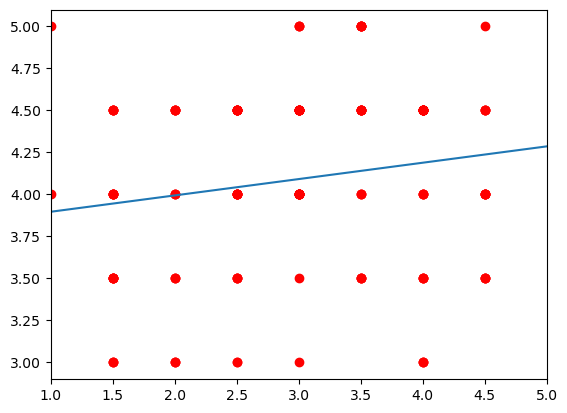

In [142]:
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept
plt.scatter(movies["Metacritic_norm_round"], movies["Bookmyshow_Stars"], color='red')
plt.plot([1,5],[pred_1,pred_5])
plt.xlim(1,5)
plt.show()

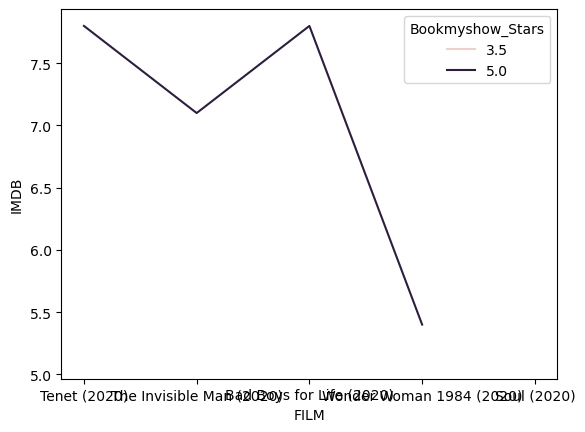

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=movies.head(), x='FILM', y='IMDB', hue='Bookmyshow_Stars')
plt.show()